Generar una red convolucional con las siguientes caracteristicas:

*   Conv1: cantidad de filtros=16, tramaño de filtro=3, stride=1, padding="same"
*   Pool1: MaxPooling, tamaño de filtro=2, stride=2
*   Conv2: cantidad de filtros=32, tramaño de filtro=3, stride=1, padding="same"
*   Pool2: MaxPooling, tamaño de filtro=2, stride=2
*   Conv3: cantidad de filtros=64, tramaño de filtro=3, stride=1, padding="same"
*   Pool3: MaxPooling, tamaño de filtro=2, stride=2
*   Conv4: cantidad de filtros=128, tramaño de filtro=3, stride=1, padding="same"
*   Linear1: cantidad de neuronas=100
*   Linear2: capa de salida

Elegir la función de activación que crean mas conveniente.

Ejercicios:

1.   Utilizando el dataset CIFAR10, provisto por PyTorch, entrenar la red sin aplicar data augmentation durante, al menos, 20 epocas. Se produce sobreentrenamiento?
2.   Utilizando el mismo dataset y aplicando las tecnicas de data augmentation que considere necesarias, entrenar nuevamente la red durante, al menos, 20 epocas sin que se produzca sobreentrenamiento hasta alcanzar un accuracy de 80% aproximadamente.
3.   A partir de los resultados obtenidos en los puntos anteriores: ¿Por qué cree que en el segundo caso el ritmo de mejora de la red es mas lento que en el primero?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torchvision
import torchsummary
import torchmetrics

Files already downloaded and verified
Files already downloaded and verified
### Descripción del conjunto de entrenamiento ###
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
### Dimensiones de un ejemplo del dataset ###
(32, 32, 3)
### Descripción del conjunto de evaluación ###
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
Label de la imágen 0: 6
Label de la imágen 1: 9
Label de la imágen 2: 9
Label de la imágen 3: 4
Label de la imágen 4: 1
Label de la imágen 5: 1
Label de la imágen 6: 2
Label de la imágen 7: 7
Label de la imágen 8: 8


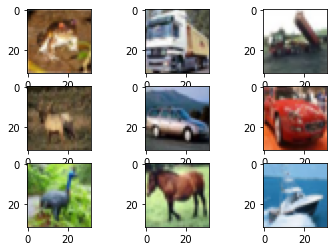

In [2]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

print("### Descripción del conjunto de entrenamiento ###")
print(train_set)
print("### Dimensiones de un ejemplo del dataset ###")
print(np.shape(train_set[0][0]))
print("### Descripción del conjunto de evaluación ###")
print(test_set)

# Ploteo algunas imagenes del dataset y sus etiquetas
for i in range(9):
  image, label = train_set[i]
  plt.subplot(331 + i)
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  print("Label de la imágen {}: {}".format(i, label))

plt.show()

In [40]:
data_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform = data_transforms)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform = data_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [41]:
valid_set_size = 5000

train_set, valid_set = torch.utils.data.random_split(train_set, [len(train_set) - valid_set_size, valid_set_size])

print("Tamaño del conjunto de entrenamiento: {}".format(len(train_set)))
print("Tamaño del conjunto de validación: {}".format(len(valid_set)))

Tamaño del conjunto de entrenamiento: 45000
Tamaño del conjunto de validación: 5000


In [85]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=45, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=len(valid_set), shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle=True)

# Creación de la Red Neuronal

*   Conv1: cantidad de filtros=16, tramaño de filtro=3, stride=1, padding="same"
*   Pool1: MaxPooling, tamaño de filtro=2, stride=2
*   Conv2: cantidad de filtros=32, tramaño de filtro=3, stride=1, padding="same"
*   Pool2: MaxPooling, tamaño de filtro=2, stride=2
*   Conv3: cantidad de filtros=64, tramaño de filtro=3, stride=1, padding="same"
*   Pool3: MaxPooling, tamaño de filtro=2, stride=2
*   Conv4: cantidad de filtros=128, tramaño de filtro=3, stride=1, padding="same"
*   Linear1: cantidad de neuronas=100
*   Linear2: capa de salida


In [86]:
class VGGNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding='same')
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding='same')
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv3 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding='same')
        self.pool3 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv4 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding='same')
        self.pool4 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = torch.nn.Linear(in_features=512, out_features=100) # de donde salen estos números
        self.fc2 = torch.nn.Linear(in_features=100, out_features=10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = self.pool4(torch.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

VGGNet_model = VGGNet()
#torchsummary.summary(VGGNet_model, (3, 32, 32))

In [87]:
torchsummary.summary(VGGNet_model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         AvgPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 32, 16, 16]           4,640
         AvgPool2d-4             [-1, 32, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
         AvgPool2d-6             [-1, 64, 4, 4]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
         AvgPool2d-8            [-1, 128, 2, 2]               0
            Linear-9                  [-1, 100]          51,300
           Linear-10                   [-1, 10]           1,010
Total params: 149,750
Trainable params: 149,750
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.29
Params size (MB): 0.57
Estimated T

In [88]:
VGGNet_optimizer = torch.optim.Adam(VGGNet_model.parameters(), lr=0.005)

VGGNet_loss = torch.nn.CrossEntropyLoss()

VGGNet_accuracy = torchmetrics.Accuracy()

In [89]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [90]:
# Epocas de entrenamiento
if torch.cuda.is_available():
  VGGNet_accuracy.to("cuda")
epochs = 20

# Agrego el grafico de la red a Tensorboard.
# [!] Debo pasarle una imagen por un bug en la funcion add_graph.
dataiter = iter(train_loader)
images, labels = dataiter.next()
writer.add_graph(VGGNet_model, images)

# Defino listas para realizar graficas de los resultados
train_loss_1 = []
train_acc_1 = []
valid_loss_1 = []
valid_acc_1 = []

## Defino mi loop de entrenamiento

for epoch in range(epochs):

  epoch_train_loss = 0.0
  epoch_train_accuracy = 0.0

  for train_data, train_target in train_loader:

      if torch.cuda.is_available():
          train_data = train_data.to("cuda")
          train_target = train_target.to("cuda")
    # Seteo los gradientes en cero ya que, por defecto, PyTorch
    # los va acumulando
      VGGNet_optimizer.zero_grad()

    # Realizo el forward pass de nuestro modelo
      output = VGGNet_model(train_data)

    # Computo el error de la salida comparando contra las etiquetas
      loss = VGGNet_loss(output, train_target)

    # Almaceno el error del batch para luego tener el error promedio de la epoca
      epoch_train_loss += loss.item()

    # Computo el nuevo set de gradientes a lo largo de toda la red
      loss.backward()

    # Realizo el paso de optimizacion actualizando los parametros de toda la red
      VGGNet_optimizer.step()

    # Calculo el accuracy del batch
      accuracy = VGGNet_accuracy(output, train_target)

    # Almaceno el accuracy del batch para luego tener el accuracy promedio de la epoca
      epoch_train_accuracy += accuracy.item()

  # Calculo la media de error y accuracy para la epoca de entrenamiento.
  # La longitud de train_loader es igual a la cantidad de batches dentro de una epoca.
  epoch_train_loss = epoch_train_loss / len(train_loader)
  epoch_train_accuracy = epoch_train_accuracy / len(train_loader)
  train_loss_1.append(epoch_train_loss)
  train_acc_1.append(epoch_train_accuracy)

  epoch_valid_loss = 0.0
  epoch_valid_accuracy = 0.0

  # Realizo el paso de validación computando error y accuracy, y
  # almacenando los valores para imprimirlos y graficarlos
  for valid_data, valid_target in valid_loader:
 # valid_data, valid_target = iter(valid_loader).next()
    output = VGGNet_model(valid_data)
    epoch_valid_loss += VGGNet_loss(output, valid_target).item()
    epoch_valid_accuracy += VGGNet_accuracy(output, valid_target).item()
  epoch_valid_loss = epoch_valid_loss / len(valid_loader)
  epoch_valid_accuracy = epoch_valid_accuracy / len(valid_loader)
  # epoch_valid_loss = VGGNet_loss(output, valid_target).item()
  # epoch_valid_accuracy = VGGNet_accuracy(output, valid_target).item()
  valid_loss_1.append(epoch_valid_loss)
  valid_acc_1.append(epoch_valid_accuracy)

  print("Epoch: {}/{} - Train loss {:.6f} - Train Accuracy {:.6f} - Valid Loss {:.6f} - Valid Accuracy {:.6f}".format(
      epoch+1, epochs, epoch_train_loss, epoch_train_accuracy, epoch_valid_loss, epoch_valid_accuracy))

  # Escribo los logs dentro de tensorboard
  writer.add_scalar("loss - train", epoch_train_loss, epoch)
  writer.add_scalar("loss - valid", epoch_valid_loss, epoch)
  writer.add_scalar("accuracy - train", epoch_train_accuracy, epoch)
  writer.add_scalar("accuracy - valid", epoch_valid_accuracy, epoch)
  writer.flush()
  
  writer.close()

Epoch: 1/20 - Train loss 1.794327 - Train Accuracy 0.332089 - Valid Loss 1.609411 - Valid Accuracy 0.404000
Epoch: 2/20 - Train loss 1.474039 - Train Accuracy 0.460511 - Valid Loss 1.394350 - Valid Accuracy 0.488200
Epoch: 3/20 - Train loss 1.327087 - Train Accuracy 0.518378 - Valid Loss 1.388503 - Valid Accuracy 0.503000
Epoch: 4/20 - Train loss 1.211767 - Train Accuracy 0.563444 - Valid Loss 1.211589 - Valid Accuracy 0.580800
Epoch: 5/20 - Train loss 1.128534 - Train Accuracy 0.595156 - Valid Loss 1.132221 - Valid Accuracy 0.597400
Epoch: 6/20 - Train loss 1.051981 - Train Accuracy 0.621622 - Valid Loss 1.214248 - Valid Accuracy 0.582400
Epoch: 7/20 - Train loss 1.005489 - Train Accuracy 0.642689 - Valid Loss 1.070458 - Valid Accuracy 0.634400
Epoch: 8/20 - Train loss 0.963560 - Train Accuracy 0.655956 - Valid Loss 1.074191 - Valid Accuracy 0.632000
Epoch: 9/20 - Train loss 0.931875 - Train Accuracy 0.667578 - Valid Loss 1.029259 - Valid Accuracy 0.641800
Epoch: 10/20 - Train loss 0.

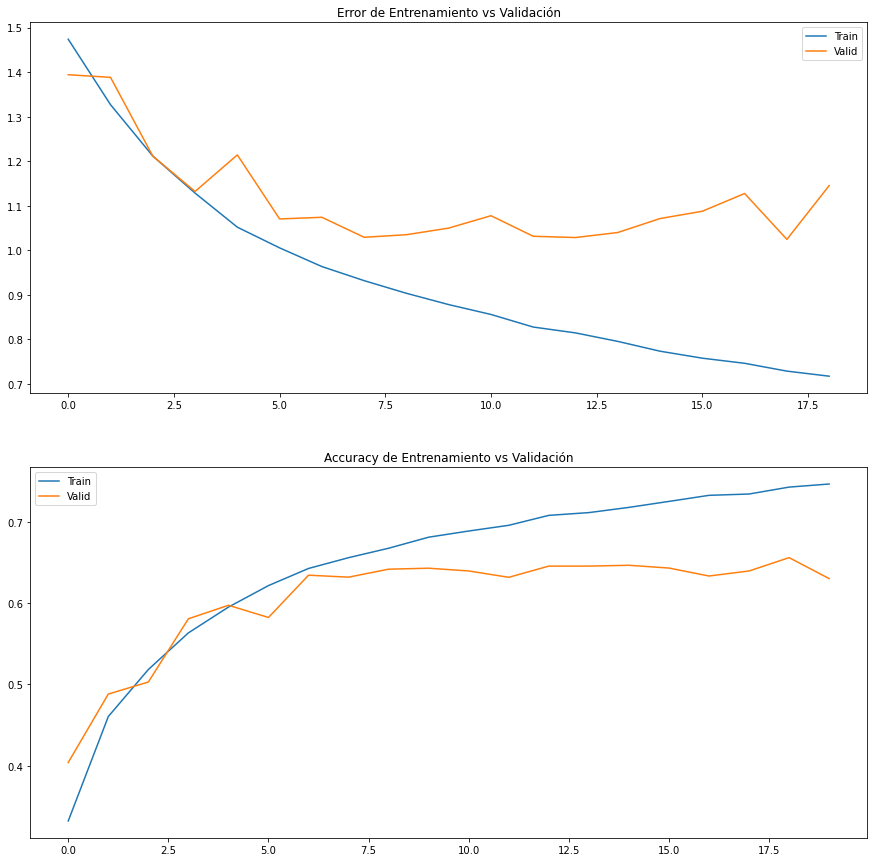

In [91]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(train_loss_1[1:]) 
axs[0].plot(valid_loss_1[1:]) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(train_acc_1) 
axs[1].plot(valid_acc_1) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [73]:
test_loss = 0.0
test_accuracy = 0.0

for test_data, test_target in test_loader:
    if torch.cuda.is_available():
        test_data, test_target = test_data.cuda(), test_target.cuda()
        
    output = VGGNet_model(test_data)
    test_loss += VGGNet_loss(output, test_target).item()
    test_accuracy += VGGNet_accuracy(output, test_target).item()

test_loss = test_loss / len(test_loader)
test_accuracy = test_accuracy / len(test_loader)

print("El modelo logro un error de {:.6f} y una accuracy de {:.6f}".format(test_loss, test_accuracy))

El modelo logro un error de 1.150317 y una accuracy de 0.726300


In [72]:
aug_data_transforms = torchvision.transforms.Compose([
                        #torchvision.transforms.RandomHorizontalFlip(0.5),
                        torchvision.transforms.RandomResizedCrop(size=(32, 32), scale=(0.5, 1.0)),
                        torchvision.transforms.ColorJitter(saturation=0.08, hue=0.07),
                        #torchvision.transforms.CenterCrop(size=(32,32)),
                        torchvision.transforms.ToTensor(),
                      ])

aug_train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform= aug_data_transforms)

Files already downloaded and verified


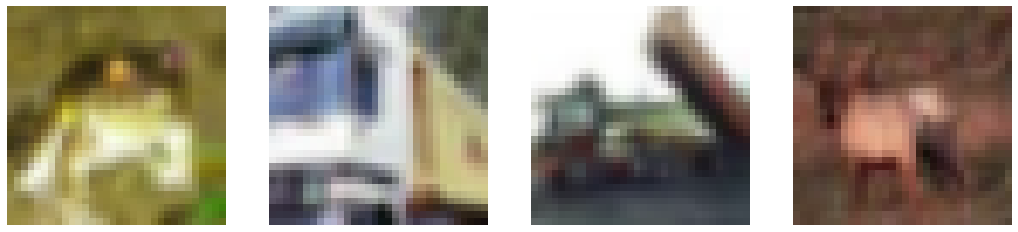

In [74]:
fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18, 18))

for id, row in enumerate(rows):
    row.imshow(aug_train_set[id][0].permute(1, 2, 0))
    row.axis('off')
plt.show()

In [75]:
aug_valid_set_size = 5000

aug_train_set, aug_valid_set = torch.utils.data.random_split(aug_train_set, [len(aug_train_set) - aug_valid_set_size, aug_valid_set_size])

print("Tamaño del conjunto de entrenamiento: {}".format(len(aug_train_set)))
print("Tamaño del conjunto de validación: {}".format(len(aug_valid_set)))

Tamaño del conjunto de entrenamiento: 45000
Tamaño del conjunto de validación: 5000


In [76]:
aug_train_loader = torch.utils.data.DataLoader(aug_train_set, batch_size=45, shuffle=True)
aug_valid_loader = torch.utils.data.DataLoader(aug_valid_set, batch_size=len(valid_set), shuffle=True)

In [77]:
aug_conv_model = VGGNet()

if torch.cuda.is_available():
    aug_conv_model = aug_conv_model.to("cuda")

aug_conv_model_optimizer = torch.optim.Adam(aug_conv_model.parameters(), lr=0.0005)

aug_conv_model_loss = torch.nn.CrossEntropyLoss()

aug_conv_model_accuracy = torchmetrics.Accuracy()

if torch.cuda.is_available():
    aug_conv_model_accuracy = aug_conv_model_accuracy.to("cuda")

epochs = 80

train_loss = []
train_acc = []
valid_loss = []
valid_acc = []


for epoch in range(epochs):
    
    epoch_train_loss = 0.0
    epoch_train_accuracy = 0.0
    
    for aug_train_data, aug_train_target in aug_train_loader:
        
        if torch.cuda.is_available():
            aug_train_data = aug_train_data.to("cuda")
            aug_train_target = aug_train_target.to("cuda")

        aug_conv_model_optimizer.zero_grad()
    
        aug_output = aug_conv_model(aug_train_data)
    
        aug_loss = aug_conv_model_loss(aug_output, aug_train_target)
        epoch_train_loss += aug_loss.item()
        aug_loss.backward()
    
        aug_conv_model_optimizer.step()
        accuracy = aug_conv_model_accuracy(aug_output, aug_train_target)
        epoch_train_accuracy += accuracy.item()


    epoch_train_loss = epoch_train_loss / len(aug_train_loader)
    epoch_train_accuracy = epoch_train_accuracy / len(aug_train_loader)
    train_loss.append(epoch_train_loss)
    train_acc.append(epoch_train_accuracy)

    epoch_valid_loss = 0.0
    epoch_valid_accuracy = 0.0

    for aug_valid_data, aug_valid_target in aug_valid_loader:
        if torch.cuda.is_available():
            aug_valid_data = aug_valid_data.to("cuda")
            aug_valid_target = aug_valid_target.to("cuda")

        aug_output = aug_conv_model(aug_valid_data)
        epoch_valid_loss += aug_conv_model_loss(aug_output, aug_valid_target).item()
        epoch_valid_accuracy += aug_conv_model_accuracy(aug_output, aug_valid_target).item()
      
    epoch_valid_loss = epoch_valid_loss / len(aug_valid_loader)
    epoch_valid_accuracy = epoch_valid_accuracy / len(aug_valid_loader)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_accuracy)

    print("Epoch: {}/{} - Train loss {:.6f} - Train Accuracy {:.6f} - Valid Loss {:.6f} - Valid Accuracy {:.6f}".format(
      epoch+1, epochs, epoch_train_loss, epoch_train_accuracy, epoch_valid_loss, epoch_valid_accuracy))

Epoch: 1/80 - Train loss 1.962560 - Train Accuracy 0.269000 - Valid Loss 1.783594 - Valid Accuracy 0.348000
Epoch: 2/80 - Train loss 1.689309 - Train Accuracy 0.377600 - Valid Loss 1.592994 - Valid Accuracy 0.423800
Epoch: 3/80 - Train loss 1.586687 - Train Accuracy 0.421644 - Valid Loss 1.543923 - Valid Accuracy 0.432200
Epoch: 4/80 - Train loss 1.533102 - Train Accuracy 0.442267 - Valid Loss 1.494392 - Valid Accuracy 0.457600
Epoch: 5/80 - Train loss 1.482546 - Train Accuracy 0.462800 - Valid Loss 1.514326 - Valid Accuracy 0.457000
Epoch: 6/80 - Train loss 1.442134 - Train Accuracy 0.478422 - Valid Loss 1.398099 - Valid Accuracy 0.500600
Epoch: 7/80 - Train loss 1.405097 - Train Accuracy 0.493889 - Valid Loss 1.368804 - Valid Accuracy 0.497800
Epoch: 8/80 - Train loss 1.365016 - Train Accuracy 0.508200 - Valid Loss 1.319687 - Valid Accuracy 0.522600
Epoch: 9/80 - Train loss 1.327292 - Train Accuracy 0.524756 - Valid Loss 1.289214 - Valid Accuracy 0.535800
Epoch: 10/80 - Train loss 1.

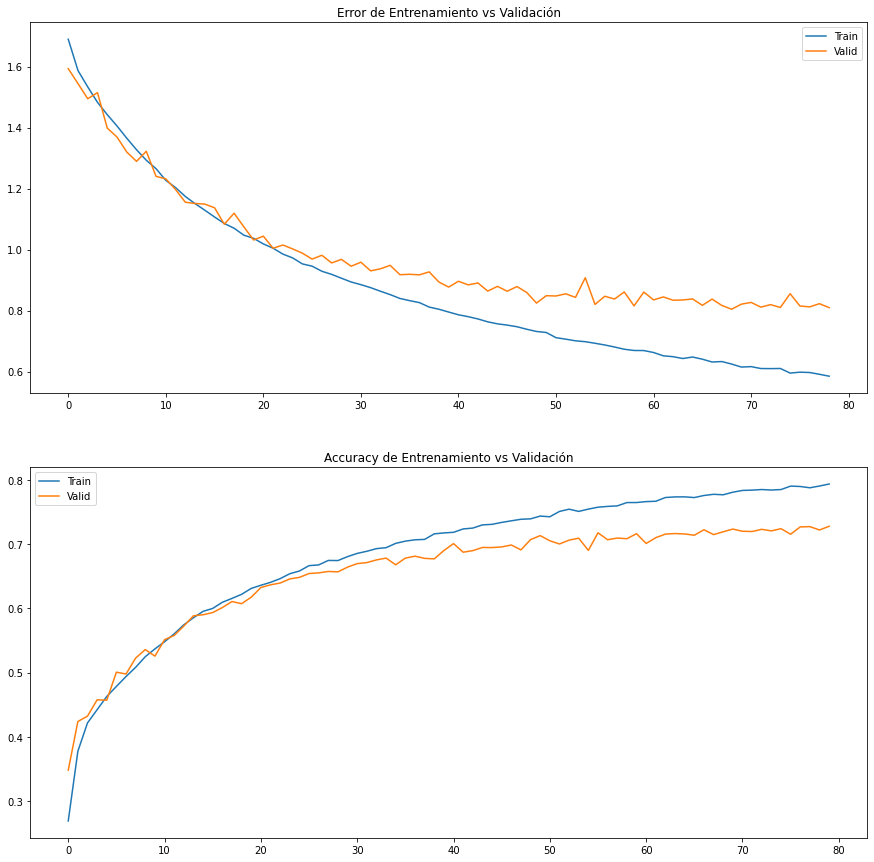

In [78]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(train_loss[1:]) 
axs[0].plot(valid_loss[1:]) 
axs[0].title.set_text('Error de Entrenamiento vs Validación') 
axs[0].legend(['Train', 'Valid'])  

axs[1].plot(train_acc) 
axs[1].plot(valid_acc) 
axs[1].title.set_text('Accuracy de Entrenamiento vs Validación') 
axs[1].legend(['Train', 'Valid'])

In [79]:
%load_ext tensorboard
%tensorboard --logdir runs

In [80]:
# Realizo el paso de evaluación computando error y accuracy
test_data, test_target = iter(test_loader).next()
output = VGGNet_model(test_data)
test_loss = VGGNet_loss(output, test_target).item()
test_accuracy = VGGNet_accuracy(output, test_target).item()

print("El modelo logro un error de {:.6f} y una accuracy de {:.6f}".format(test_loss, test_accuracy))

El modelo logro un error de 1.150317 y una accuracy de 0.726300
